                        Specs         Score
5                 pickup_time  2.064019e+14
6                   drop_time  2.036910e+14
2               meter_waiting  1.805216e+07
1                    duration  7.047854e+06
3          meter_waiting_fare  1.098877e+06
11                       fare  5.403517e+05
4   meter_waiting_till_pickup  2.237067e+04
0             additional_fare  1.561890e+04
7                    pick_lat  9.362520e-02
9                    drop_lat  5.772791e-02
10                   drop_lon  2.557430e-02
8                    pick_lon  1.808710e-02
[0.06390615 0.17619272 0.08723326 0.05612851 0.06268107 0.05998526
 0.06102868 0.05795393 0.06006137 0.05904434 0.06226328 0.19352145]


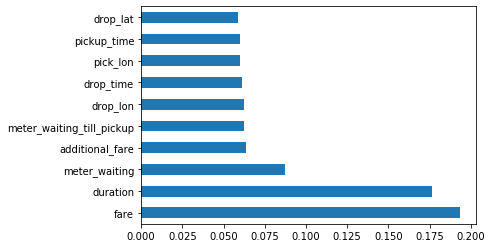

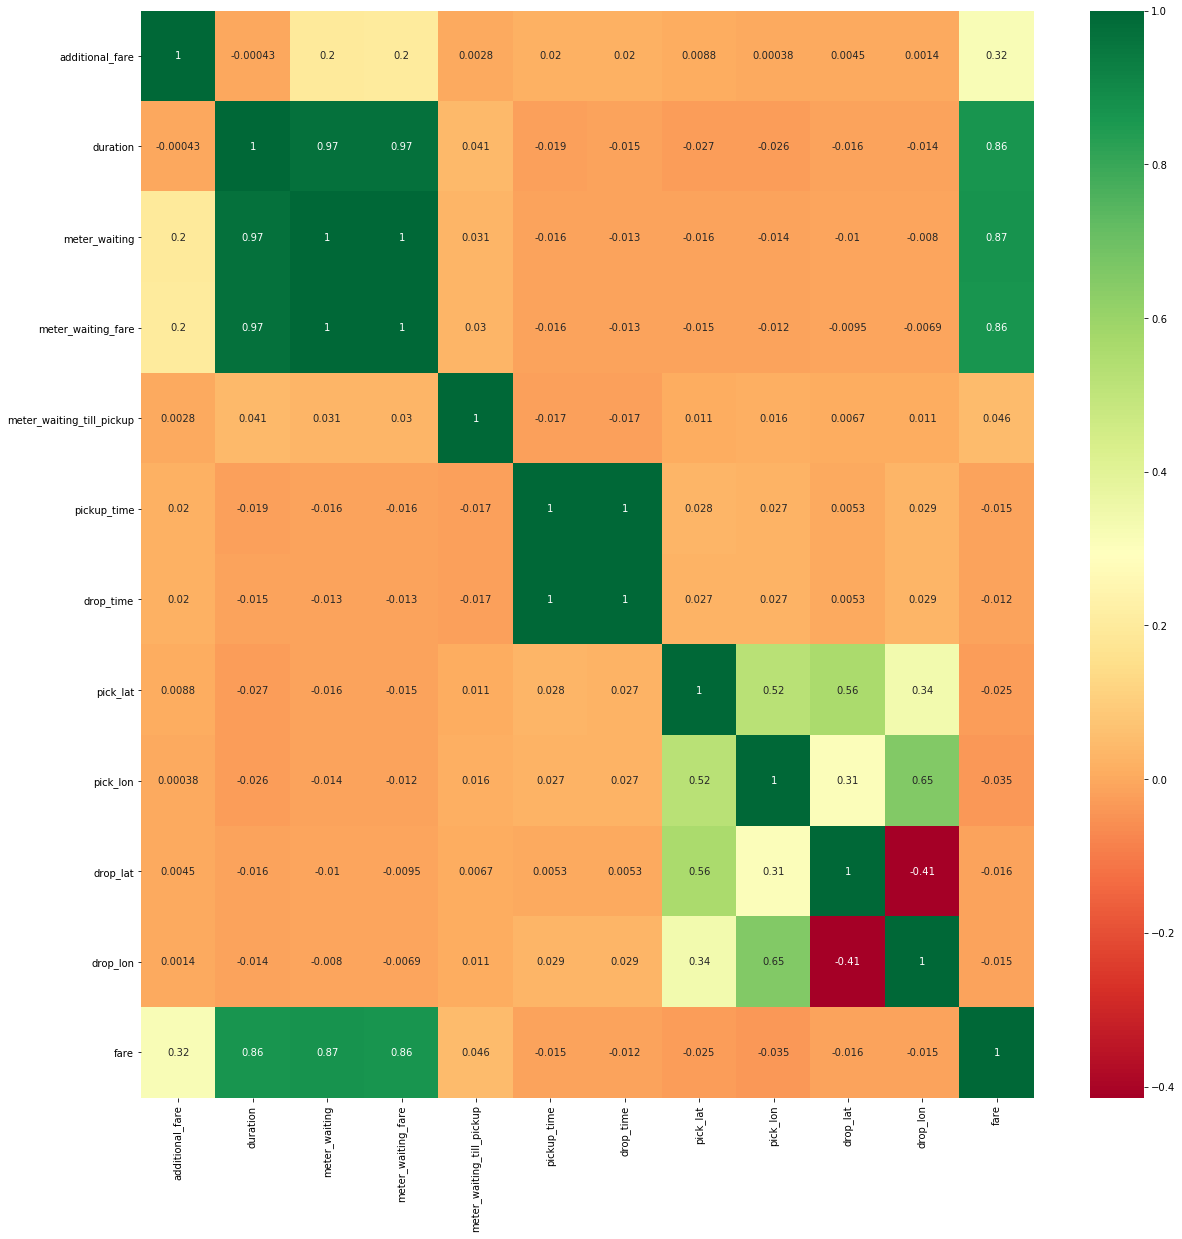

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns


def read_file(file_name):
    return pd.read_csv(file_name)


def read_data_set(file_name, is_train):
    df = read_file(file_name)

    if is_train:
        df.label = [1 if each == 'correct' else 0 for each in df.label]

    return df

def uni_variate_selection(data_set):
    y = data_set['label']
    x = data_set.drop(['tripid', 'label'], axis=1)
    x = x.replace(to_replace=np.nan, value=0)
    x.pickup_time = [pd.to_datetime(each).value if each != 0 else 0 for each in x.pickup_time]
    x.drop_time = [pd.to_datetime(each).value if each != 0 else 0 for each in x.drop_time]

    # apply SelectKBest class to extract best features
    best_features = SelectKBest(score_func=chi2, k=len(x.columns))
    fit = best_features.fit(x, y)
    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(x.columns)

    # concat two data frames for better visualization
    feature_scores = pd.concat([df_columns, df_scores], axis=1)
    feature_scores.columns = ['Specs', 'Score']

    print(feature_scores.nlargest(len(x.columns), 'Score'))


def feature_importance(data_set):
    y = data_set['label']
    x = data_set.drop(['tripid', 'label'], axis=1)
    x = x.replace(to_replace=np.nan, value=0)
    x.pickup_time = [pd.to_datetime(each).value if each != 0 else 0 for each in x.pickup_time]
    x.drop_time = [pd.to_datetime(each).value if each != 0 else 0 for each in x.drop_time]

    model = ExtraTreesClassifier()
    model.fit(x, y)
    print(model.feature_importances_)
    feat_importance = pd.Series(model.feature_importances_, index=x.columns)
    feat_importance.nlargest(10).plot(kind='barh')
    plt.show()


def heat_map(data_set):
    data_set = data_set.drop(['tripid', 'label'], axis=1)
    data_set = data_set.replace(to_replace=np.nan, value=0)
    data_set.pickup_time = [pd.to_datetime(each).value if each != 0 else 0 for each in data_set.pickup_time]
    data_set.drop_time = [pd.to_datetime(each).value if each != 0 else 0 for each in data_set.drop_time]

    corrmat = data_set.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20, 20))
    g = sns.heatmap(data_set[top_corr_features].corr(), annot=True, cmap="RdYlGn")
    plt.show()


def model():
    train_data_set = read_data_set('train.csv', True)

    uni_variate_selection(train_data_set)
    feature_importance(train_data_set)
    heat_map(train_data_set)


model()
